In [1]:
%load_ext lab_black
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
df = pd.read_csv(
    "../Data/mrgdata_food.csv",
    index_col="Census Tract",
    usecols=[
        "Census Tract",
        "Data_Value_bp",
        "Data_Value_chol",
        "Data_Value_dbt",
        "Data_Value_obs",
        "Lat_obs",
        "Lng_obs",
        "Total 18+ Population",
        "Number of Fast Food",
    ],
)
df

,Data_Value_bp,Data_Value_chol,Data_Value_dbt,Data_Value_obs,Lat_obs,Lng_obs,Total 18+ Population,Number of Fast Food
Census Tract,,,,,,,,
48453000604,11.8,12.6,2.9,22.3,30.285534,-97.747727,7064,12
48453002113,31.0,32.3,11.4,30.4,30.317043,-97.672532,2968,2
48453001718,22.9,30.0,6.5,20.2,30.348304,-97.761025,5188,1
48453001908,18.1,24.9,5.5,22.7,30.267362,-97.891753,7017,0
48453002212,25.5,27.7,9.6,32.1,30.310133,-97.591602,739,0
...,...,...,...,...,...,...,...,...
48453002435,22.3,25.8,8.7,31.5,30.160227,-97.640604,6031,0
48453002429,15.7,20.0,4.7,25.9,30.167511,-97.773575,1004,0
48453002426,20.3,24.9,7.6,28.3,30.154824,-97.752069,7722,0


In [3]:
# dropping NaNs
df = df.dropna()

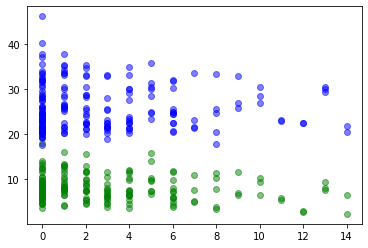

In [4]:
# create a scatter of fast food restuarants and health issue
plt.scatter(
    df["Number of Fast Food"],
    df["Data_Value_dbt"],
    color="green",
    alpha=0.50,
    label="Diabetes",
)
plt.scatter(
    df["Number of Fast Food"],
    df["Data_Value_obs"],
    color="blue",
    alpha=0.50,
    label="Obesity",
)
plt.show()

In [5]:
# finding correlation between fast food and health issue
corr_obs = st.pearsonr(df["Number of Fast Food"], df["Data_Value_obs"])
corr_dbt = corr = st.pearsonr(df["Number of Fast Food"], df["Data_Value_dbt"])

print(f"The correlation between fast food and obesity is {round(corr_obs[0],2)}")
print(f"The correlation between fast food and diabetes is {round(corr_dbt[0],2)}")

The correlation between fast food and obesity is -0.02
The correlation between fast food and diabetes is -0.17


Line equation for Diabetes y = -0.1433615819209041x + 8.4
Line equation for Diabetes y = -0.03228759235115172x + 26.02


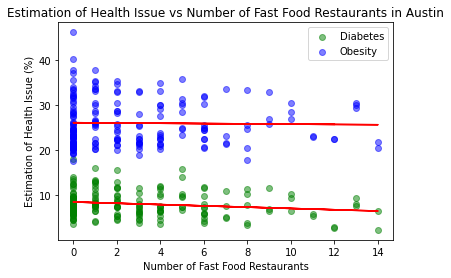

The correlation between fast food restaurants in Austin and obesity is -0.02
The correlation between fast food restaurants in Austin and diabetes is -0.17


In [8]:
# calculate the regression lines for dbt and obs
from scipy.stats import linregress

# diabetes line
(slope, intercept, rvalue, pvalue, stderr) = linregress(
    df["Number of Fast Food"], df["Data_Value_dbt"]
)
regress_values_dbt = [
    income * slope + intercept for income in df["Number of Fast Food"]
]
line_eq_dbt = "y = " + str(slope) + "x + " + str(round(intercept, 2))

# obesity line
(slope, intercept, rvalue, pvalue, stderr) = linregress(
    df["Number of Fast Food"], df["Data_Value_obs"]
)
regress_values_obs = [
    income * slope + intercept for income in df["Number of Fast Food"]
]
line_eq_obs = "y = " + str(slope) + "x + " + str(round(intercept, 2))


# create a scatter of fast food restuarants and health issue  with the regression line
print(f"Line equation for Diabetes {line_eq_dbt}")
print(f"Line equation for Diabetes {line_eq_obs}")
plt.scatter(
    df["Number of Fast Food"],
    df["Data_Value_dbt"],
    color="green",
    alpha=0.50,
    label="Diabetes",
)
plt.scatter(
    df["Number of Fast Food"],
    df["Data_Value_obs"],
    color="blue",
    alpha=0.50,
    label="Obesity",
)
plt.plot(df["Number of Fast Food"], regress_values_dbt, "r-")
plt.plot(df["Number of Fast Food"], regress_values_obs, "r-")
plt.xlabel("Number of Fast Food Restaurants")
plt.ylabel("Estimation of Health Issue (%)")
plt.title("Estimation of Health Issue vs Number of Fast Food Restaurants in Austin")
plt.legend()
plt.show()

print(
    f"The correlation between fast food restaurants in Austin and obesity is {round(corr_obs[0],2)}"
)
print(
    f"The correlation between fast food restaurants in Austin and diabetes is {round(corr_dbt[0],2)}"
)